# Data Science - Supervised Classification Learning Algorithms - HR Dataset

In [45]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

df = pd.read_csv(r'C:\PAULDATA\Data Analyst Labs\hr_comma_sep.csv')
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [2]:
df.shape

(14999, 10)

In [3]:
# Check the number of rows/entries for each value of Target
# This sample dataset has a good balanced Target values
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [4]:
# Apply Label Encoder for all String/Object Column
le = LabelEncoder()
objcols = df.select_dtypes(object).columns
for col in objcols:
    df[col] = le.fit_transform(df[col])

In [5]:
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years  department  \
0                   3              0     1                      0           7   
1                   6              0     1                      0           7   

   salary  
0       1  
1       2

In [6]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years    department        salary  
count           14999.000000  14999.000000  14999.000000  
mean                0.021268      5.870525      1.347290  
std                 0.144281      2.868786      0.625819  
min                 0.000000      0.000000      0.000000  
25%                 0.000000      4.000000      1.000000  
50%                 0.000000      7.000000      1.000000  
75%                 0.000000      8.000000      2.000000  
max                 1.000000      9.000000      2.000000

In [7]:
# What Features that influence the output of Target column
df.groupby('left').mean('satisfaction_level')

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  department    salary  
left                                               
0                  0.026251    5.819041  1.347742  
1                  0.005321    6.035284  1.345842

In [8]:
# Check how 'salary' influence the value of Target column
df[df['left'] == 1].salary.value_counts()

salary
1    2172
2    1317
0      82
Name: count, dtype: int64

In [9]:
# df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df2 = df[['time_spend_company','average_montly_hours','promotion_last_5years','salary']]
df2.head(5)

time_spend_company  average_montly_hours  promotion_last_5years  salary
0                   3                   157                      0       1
1                   6                   262                      0       2
2                   4                   272                      0       2
3                   5                   223                      0       1
4                   3                   159                      0       1

<Axes: xlabel='average_montly_hours', ylabel='promotion_last_5years'>

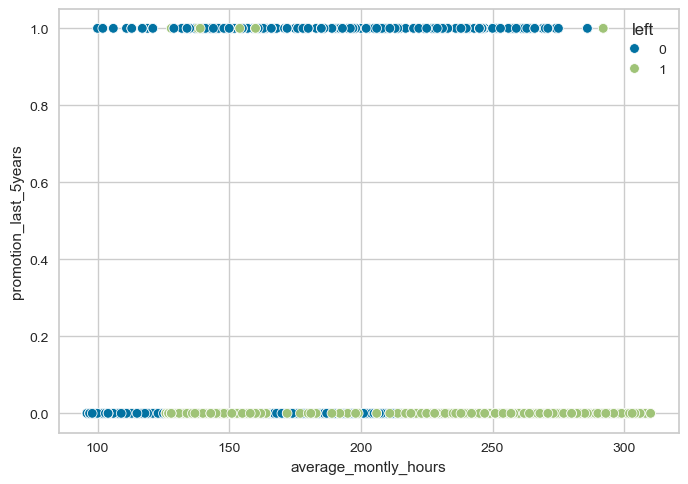

In [10]:
# Draw the Scatter Plot of time_spend_company and average_montly_hours cols.
sns.scatterplot(x='average_montly_hours', y='promotion_last_5years', data=df, hue='left')

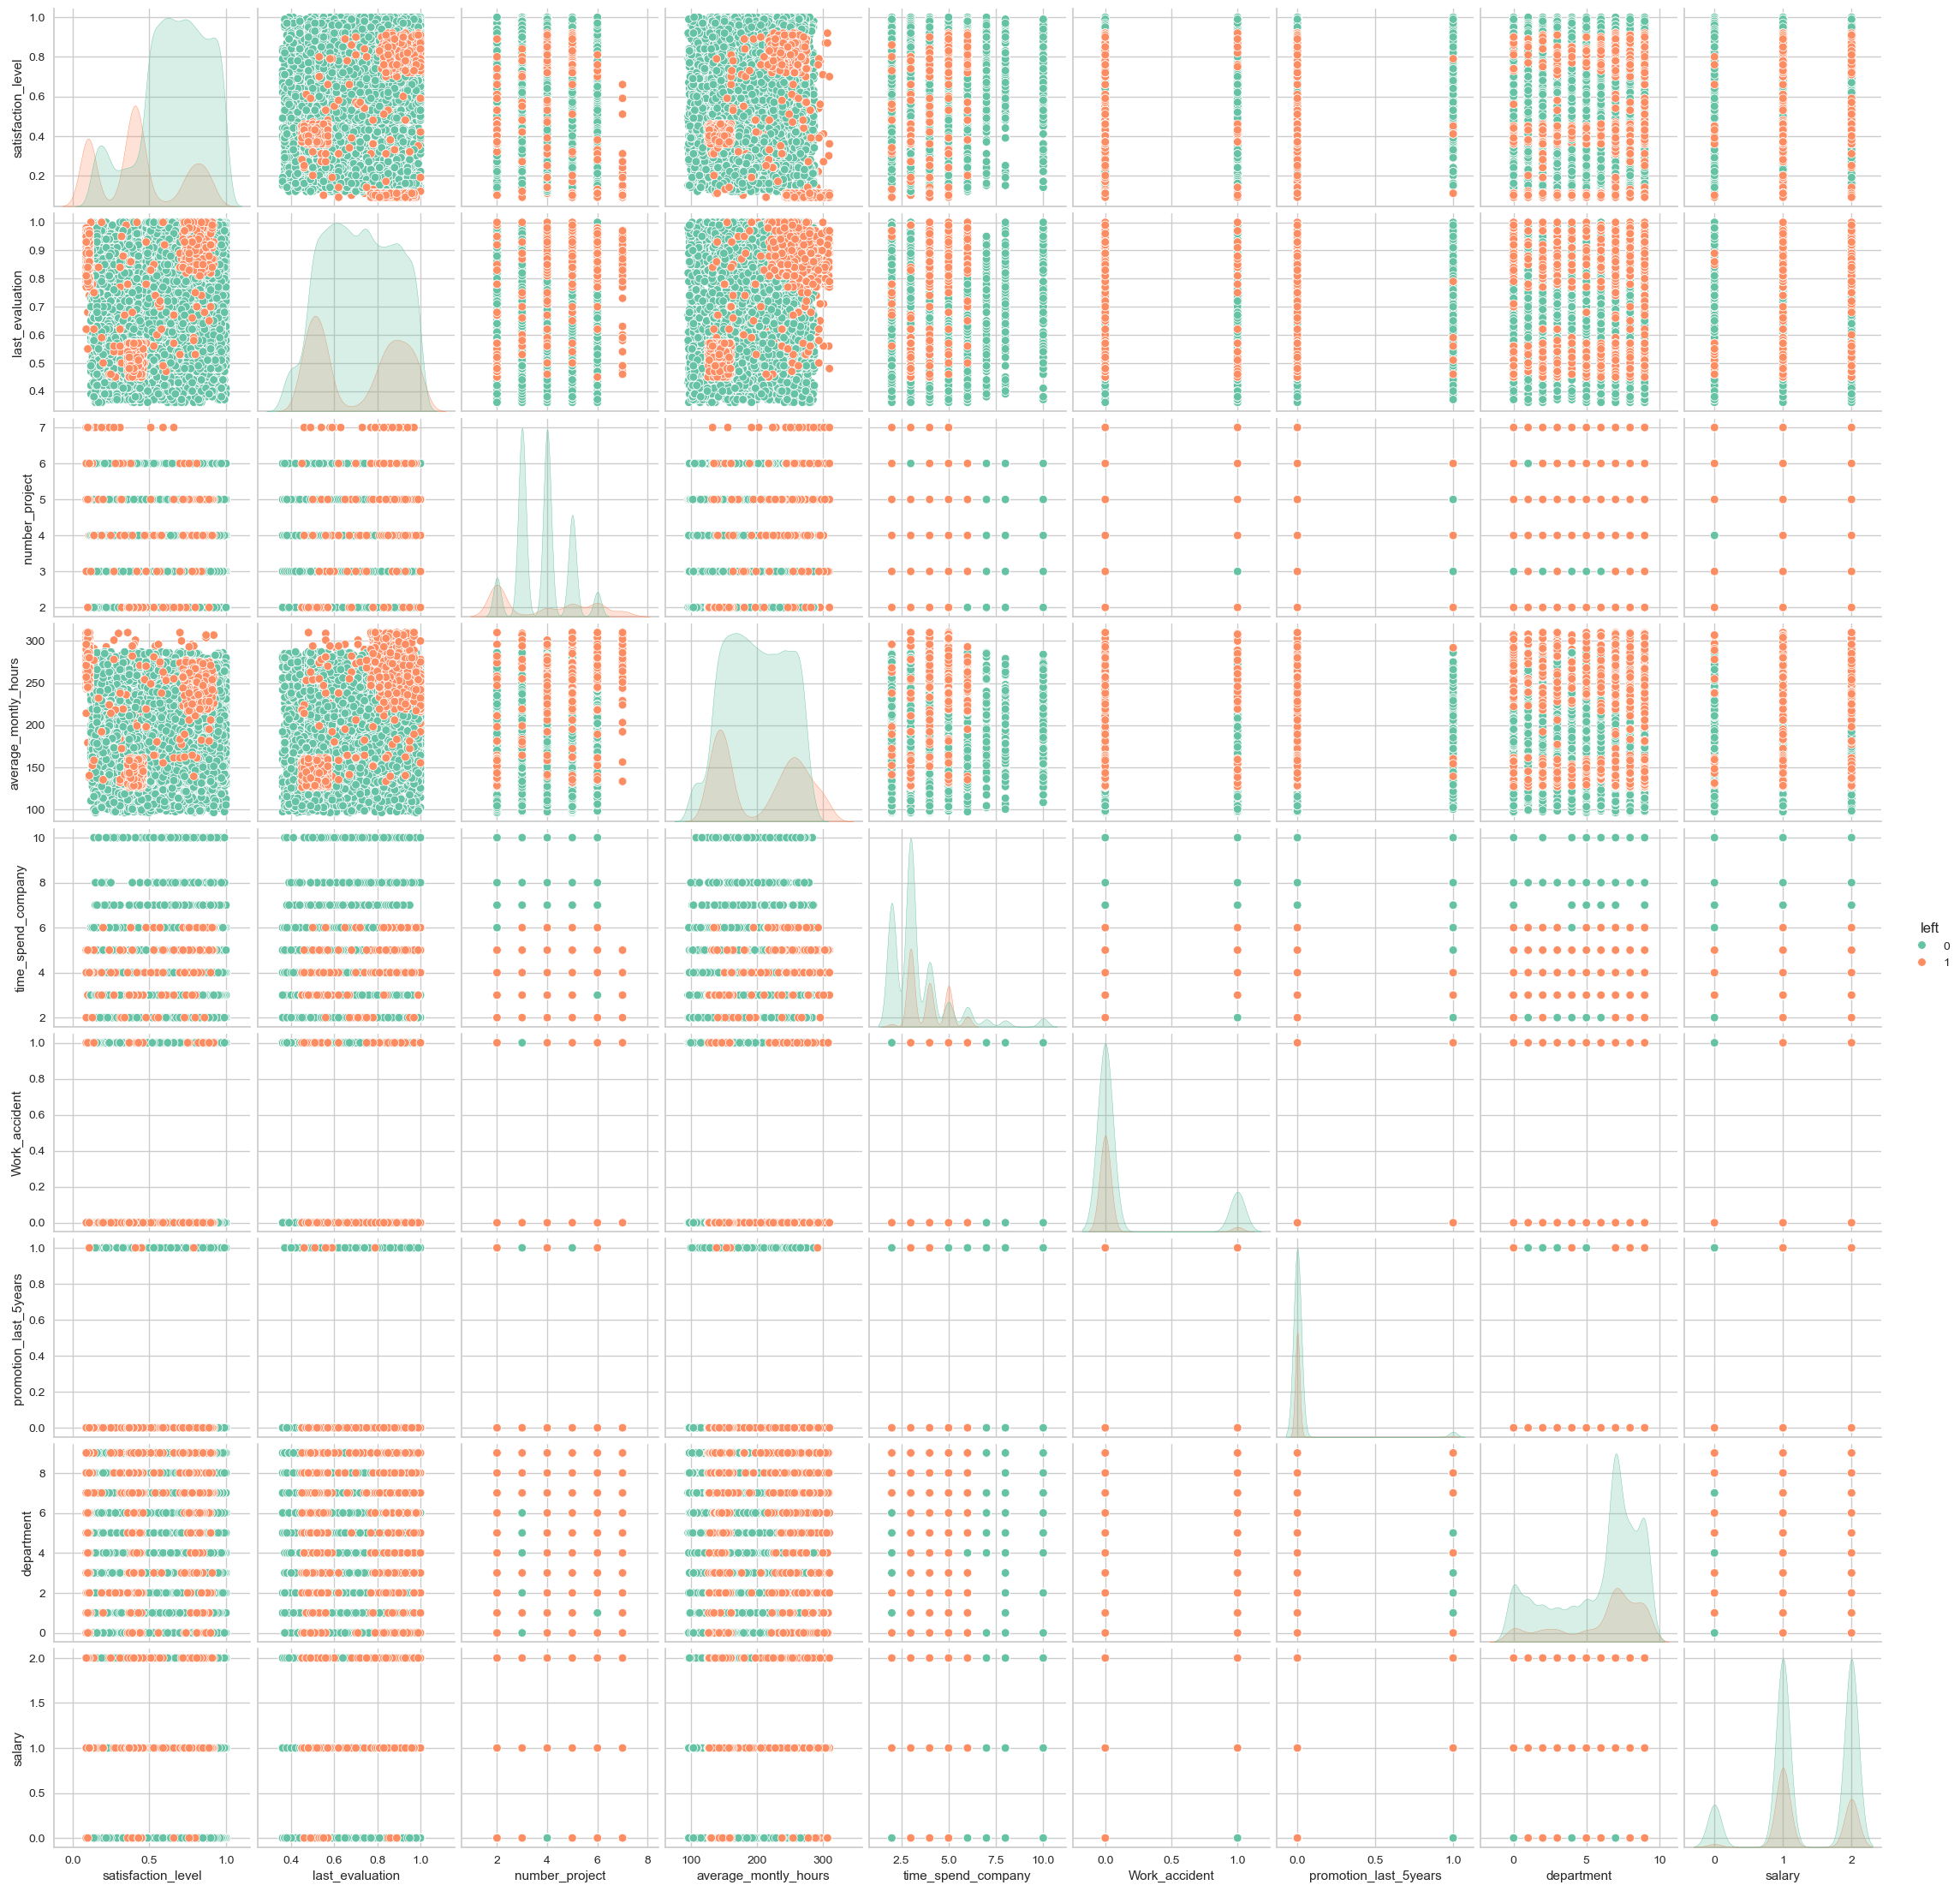

In [11]:
# Draw Pair Plot for the Data points in the Dataset
sns.pairplot(data=df, hue='left', palette='Set2')

In [12]:
# Grab the Train data
X = df2
y = df.left

# Grab the Columns name
colnames = X.columns
print(colnames)

Index(['time_spend_company', 'average_montly_hours', 'promotion_last_5years',
       'salary'],
      dtype='object')


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [14]:
# Scale the Feature values to standard (standardization)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.02880759,  1.10456336, -0.1446749 , -0.56749608],
       [-0.34259299,  1.38491653, -0.1446749 ,  1.03659943],
       [-0.34259299,  0.42370568,  6.9120491 ,  1.03659943],
       ...,
       [ 0.3431073 ,  1.08453814, -0.1446749 , -0.56749608],
       [ 1.02880759,  0.78415975, -0.1446749 ,  1.03659943],
       [ 3.08590846,  0.8242102 , -0.1446749 ,  1.03659943]])

In [15]:
# LOGISTIC REGRESSION ALGORITHM

In [16]:
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000)

In [17]:
# Check the Model accuracy
print('Logistic Regression Accuracy Score:', lr.score(X_test, y_test))

Logistic Regression Accuracy Score: 0.7583333333333333


In [18]:
# Check the Classification Report
y_pred_lr = lr.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred_lr))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_lr))
print('f1_score:', f1_score(y_test, y_pred_lr))

accuracy_score: 0.7583333333333333
roc_auc_score: 0.4909365558912387
f1_score: 0.0


In [19]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      2317
           1       0.00      0.00      0.00       683

    accuracy                           0.76      3000
   macro avg       0.38      0.49      0.43      3000
weighted avg       0.59      0.76      0.67      3000



In [20]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_lr)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2275,   42],
       [ 683,    0]], dtype=int64)

In [21]:
# Create SVM Model Object
# Kernel possible values: linear, rbf, poly, sigmoid.
svm = SVC(kernel='rbf', C=100)
#svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=100)

In [22]:
# Test the created Model using the Test data
y_pred_svm = svm.predict(X_test)
if isinstance(svm, SVC):
    print('accuracy_score:', accuracy_score(y_test, y_pred_svm)) # accuracy_score CANNOT be used with binary and continuous Feature values in SVR
    print('roc_auc_score:', roc_auc_score(y_test, y_pred_svm)) # roc_auc_score CAN be used with binary and continuous Feature values in SVR
    print('f1_score:', f1_score(y_test, y_pred_svm))  # f1_score CANNOT be used with binary and continuous Feature values in SVR
elif isinstance(svm, SVR):
    print('roc_auc_score:', roc_auc_score(y_test, y_pred_svm)) # roc_auc_score CAN be used with binary and continuous Feature values in SVR



accuracy_score: 0.867
roc_auc_score: 0.8565915181632228
f1_score: 0.7414128321451717


In [23]:
print(classification_report(y_test, y_pred_svm))  # classification_report CANNOT be used with binary and continuous Feature values

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2317
           1       0.67      0.84      0.74       683

    accuracy                           0.87      3000
   macro avg       0.81      0.86      0.83      3000
weighted avg       0.88      0.87      0.87      3000



In [24]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_svm)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2029,  288],
       [ 111,  572]], dtype=int64)

In [25]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
y_pred_dt = classifier.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred_dt))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_dt))
print('f1_score:', f1_score(y_test, y_pred_dt))

accuracy_score: 0.873
roc_auc_score: 0.8527318293522129
f1_score: 0.7451505016722408


In [27]:
print(classification_report(y_test, y_pred_dt))  # classification_report CANNOT be used with binary and continuous Feature values

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2317
           1       0.69      0.82      0.75       683

    accuracy                           0.87      3000
   macro avg       0.81      0.85      0.83      3000
weighted avg       0.88      0.87      0.88      3000



In [28]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_dt)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2062,  255],
       [ 126,  557]], dtype=int64)

In [29]:
# Train the Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
# Check accuracy of the Model
print(accuracy_score(y_test, y_pred_rf))

# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_rf)

0.874


array([[2052,  265],
       [ 113,  570]], dtype=int64)

In [31]:
# Check the importance value of each Feature
#pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.Series(rf.feature_importances_ , index=colnames).sort_values(ascending=False)

average_montly_hours     0.574788
time_spend_company       0.383222
salary                   0.035406
promotion_last_5years    0.006583
dtype: float64

In [32]:
X_train

array([[ 1.02880759,  1.10456336, -0.1446749 , -0.56749608],
       [-0.34259299,  1.38491653, -0.1446749 ,  1.03659943],
       [-0.34259299,  0.42370568,  6.9120491 ,  1.03659943],
       ...,
       [ 0.3431073 ,  1.08453814, -0.1446749 , -0.56749608],
       [ 1.02880759,  0.78415975, -0.1446749 ,  1.03659943],
       [ 3.08590846,  0.8242102 , -0.1446749 ,  1.03659943]])

In [33]:
gb = GradientBoostingClassifier(n_estimators=500)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(accuracy_score(y_test, y_pred_gb))

0.878


In [34]:
ab = AdaBoostClassifier(n_estimators=45, algorithm='SAMME', learning_rate=1, random_state=0)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

In [35]:
# Check the Accuracy
print(accuracy_score(y_test, y_pred_ab))
print(roc_auc_score(y_test, y_pred_ab))
print(f1_score(y_test, y_pred_ab))

0.773
0.5654813773806311
0.27009646302250806


In [36]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_ab)

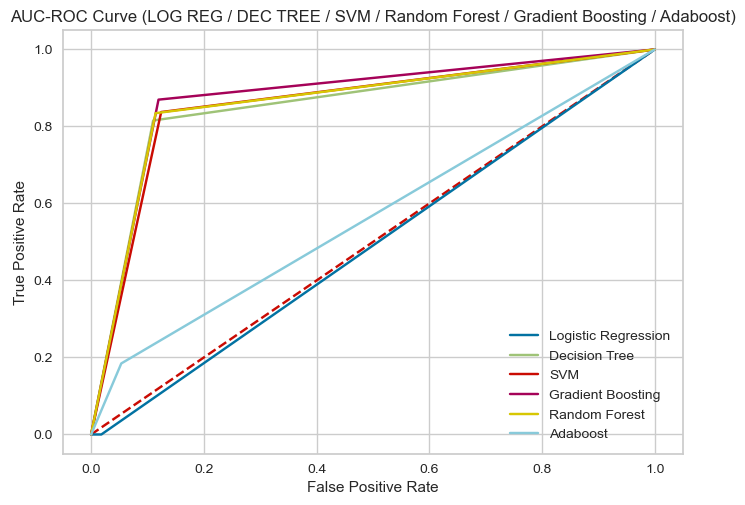

In [44]:
# Plot the False Positive Rate and True Positive Rate (ROC curve)
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1], 'r--' )
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_ab, tpr_ab, label='Adaboost')
plt.title("AUC-ROC Curve (LOG REG / DEC TREE / SVM / Random Forest / Gradient Boosting / Adaboost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()

In [ ]:
K-NEAREST NEIGHBORS ALGORITHM (KNN)

In [46]:
data = datasets.load_wine(as_frame=True)
X = data.data
y = data.target
names = data.target_names
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [47]:
X.head(3)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0

In [48]:
# Check how many Target Classes exist in this Dataset.
names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [49]:
df = pd.DataFrame(X,columns=data.feature_names)
df['wine class'] = data.target
df['wine class'] = df['wine class'].replace(to_replace=['class_0','class_1','class_2'], value=[0,1,2])

In [50]:
df.head(2)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   od280/od315_of_diluted_wines  proline  wine class  
0                          3.92   1065.0           0  
1                          3.40   1050.0           0

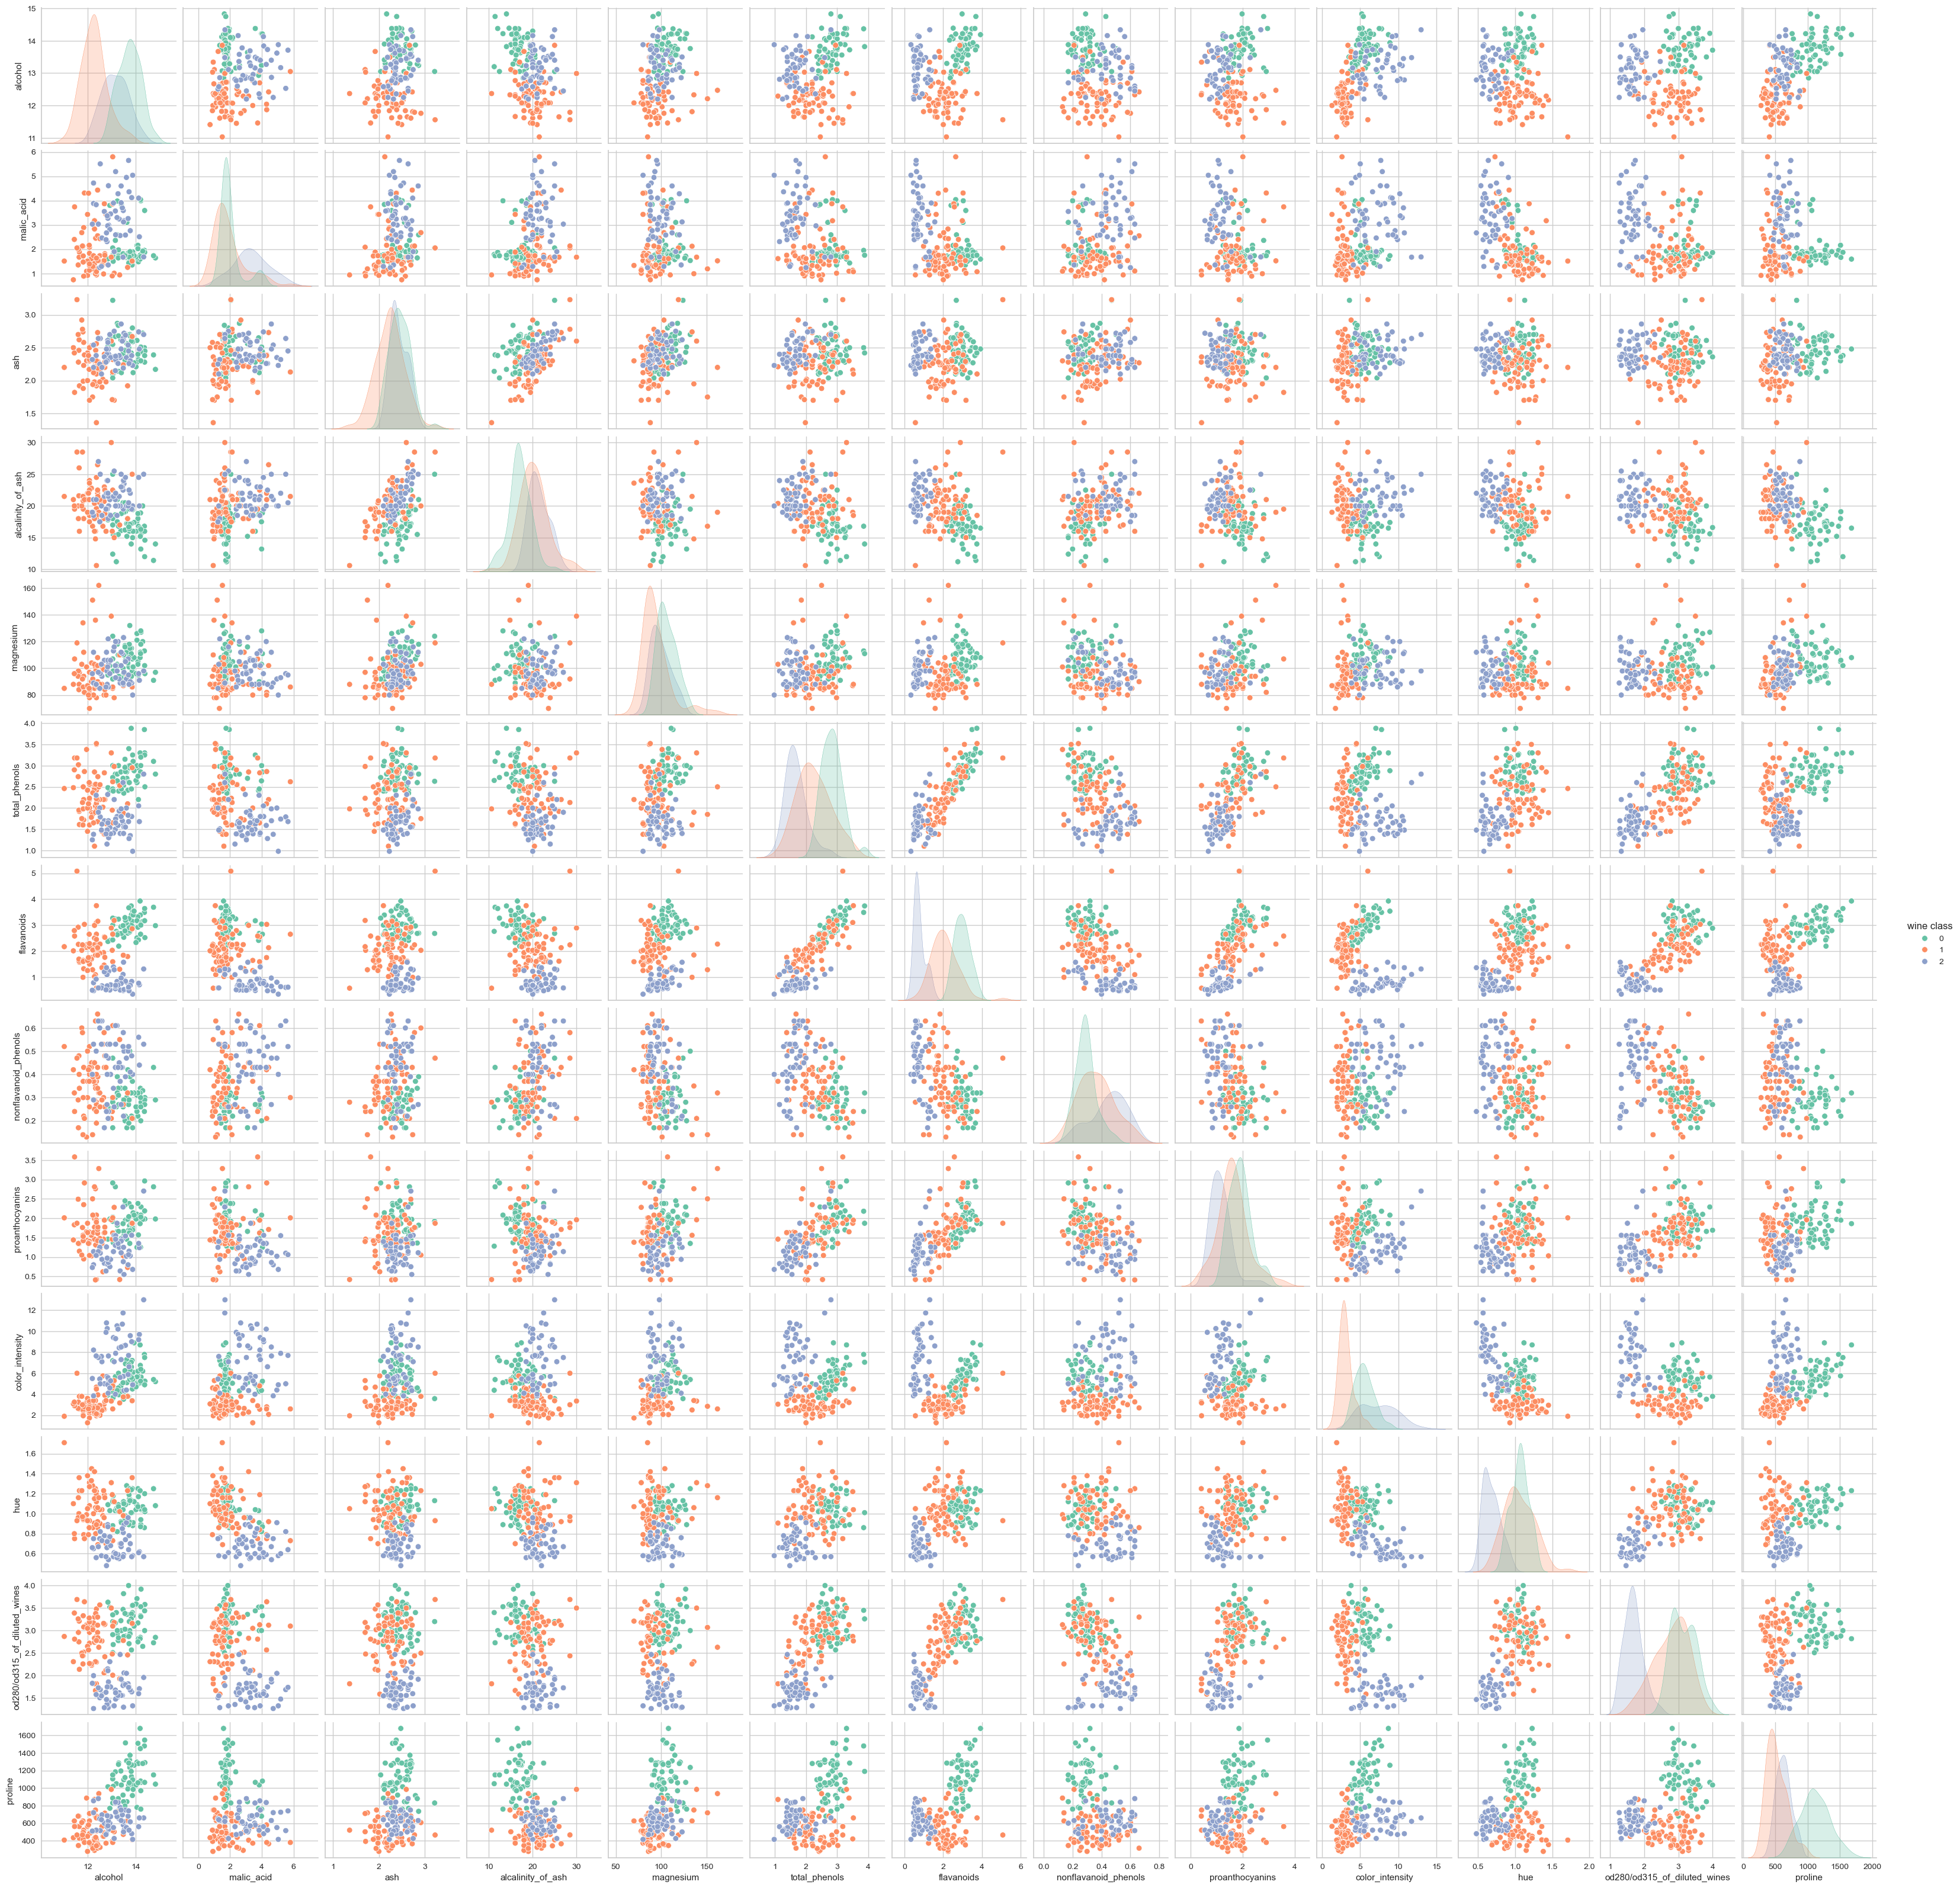

In [51]:
# Draw Pair Plot for the Data points in the Dataset
sns.pairplot(data=df, hue='wine class', palette='Set2')

In [ ]:
# In this Plot, we can see Correlation between two Features to decide what algorithm fits the Best.

In [52]:
# Now, we check whether there's any Null value
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [53]:
# Grab Train Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Scale the Train and Test Data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [54]:
print(len(X_train.columns))
print(len(X_train))

13
142


In [55]:
X_train.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
95     12.47        1.52  2.20               19.0      162.0           2.50   
91     12.00        1.51  2.42               22.0       86.0           1.45   
24     13.50        1.81  2.61               20.0       96.0           2.53   
109    11.61        1.35  2.70               20.0       94.0           2.74   
121    11.56        2.05  3.23               28.5      119.0           3.18   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
95         2.27                  0.32             3.28             2.60  1.16   
91         1.25                  0.50             1.63             3.60  1.05   
24         2.61                  0.28             1.66             3.52  1.12   
109        2.92                  0.29             2.49             2.65  0.96   
121        5.08                  0.47             1.87             6.00  0.93   

     od280/od315_of_diluted_wines  proline  
95                           2.63    937.0  
91                           2.65    450.0  
24                           3.82    845.0  
109                          3.26    680.0  
121                          3.69    465.0

In [56]:
# Calculate the best K value for KNN model
math.ceil(math.sqrt(len(y_test)))

6

In [57]:
# Make and Train the Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.7222222222222222


In [58]:
# With Scaled Data
knnsc = KNeighborsClassifier(n_neighbors=6)
knnsc.fit(X_train_sc, y_train)
y_pred_knnsc = knnsc.predict(X_test_sc)
print(accuracy_score(y_test, y_pred_knnsc))

0.9444444444444444


In [38]:
print("-*"*30)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
